In [238]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Investigate effect of remeshing on error

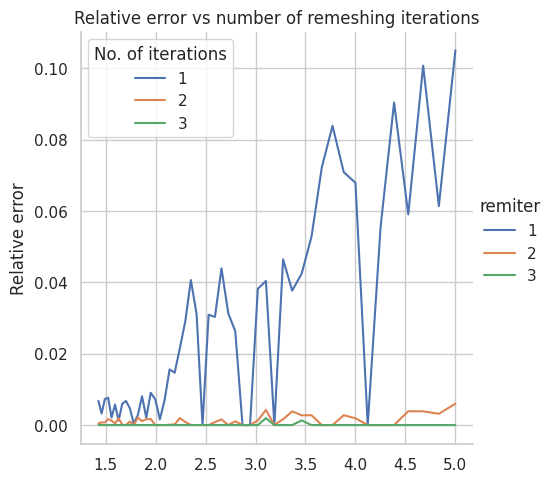

remiter
0    0.999903
1    0.028596
2    0.001191
3    0.000065
4    0.000000
Name: error, dtype: float64

In [297]:
sns.set_theme()
sns.set_style("whitegrid")
res = pd.read_csv("ringloop.csv")

res["R/W"] = res["R"]/res["W"]



res = res.assign(error=None)
le = []
for index, row in res.iterrows():
    err = (row["numerical"] - (res[(res["simiter"] == row["simiter"]) & (res["remiter"] == 4)]["numerical"]))
    val = float((res[(res["simiter"] == row["simiter"]) & (res["remiter"] == 4)]["numerical"]).to_numpy()[0])
    err = float(err.to_numpy()[0])
    res.iloc[index,-1] = abs(err/val)



# sns.scatterplot(res[(res["remiter"] >= 0) & ((res["simiter"] != 30) & (res["simiter"] != 24))],
#                 x = "R/W",
#                 y = "numerical",
#                 palette="deep",
#                 hue="remiter",
#                 style="remiter",
#                 )
# plt.show()
# sns.relplot(res,x="simiter",y="numerical",kind="line")
# plt.show()

df = res[(res["remiter"] != 0) & (res["remiter"] != 4)].copy()
df["totaltime"] = df["meshtime"] + df["tthtime"] + df["nextime"]

pl = sns.relplot(df,x="R/W",y="error",palette="deep",kind="line",hue="remiter")
# pl.set(yscale="log")
plt.legend(title="No. of iterations")
plt.title("Relative error vs number of remeshing iterations")
plt.ylabel("Relative error")
plt.xlabel("R/W")
plt.show()



# sns.barplot(df,x="R/W",y="elementcount",palette="deep",hue="remiter",capsize=.1)
# plt.legend(title="No. of iterations")

# plt.show()

res.groupby("remiter")['error'].mean( )


## Investigate remesh iterations vs element count and meshing time

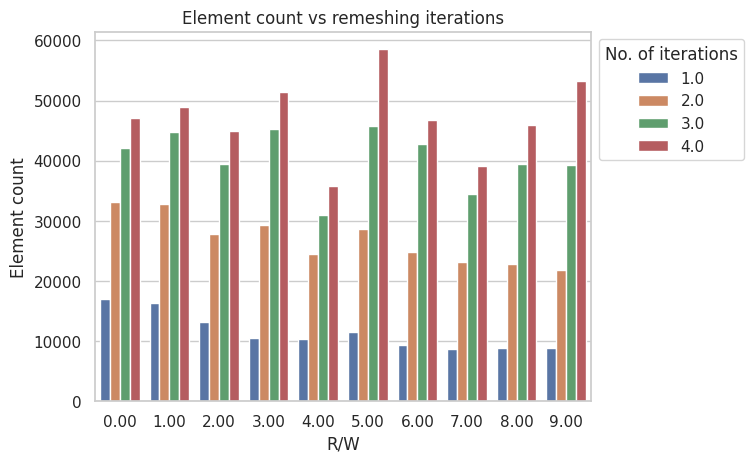

In [285]:
def format_labels(value, _):
    return f'{value:.2f}'

res["bins"] = pd.cut(res["R/W"],10)

df1 = res[res["remiter"] == 1].copy().groupby('bins').mean(numeric_only = True)
df2 = res[res["remiter"] == 2].copy().groupby('bins').mean(numeric_only = True)
df3 = res[res["remiter"] == 3].copy().groupby('bins').mean(numeric_only = True)
df4 = res[res["remiter"] == 4].copy().groupby('bins').mean(numeric_only = True)

grouped = pd.concat([df1,df2,df3,df4])

# grouped = grouped.sort_values(by="R/W")

grouped_sorted = grouped.sort_values(by="elementcount",ascending=False)
bp = sns.barplot(grouped_sorted,x="R/W",y="elementcount",palette="deep",hue="remiter")
bp.xaxis.set_major_formatter(FuncFormatter(format_labels))

plt.title("Element count vs mesh optimisation iterations")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title="No. of iterations")
plt.ylabel("Element count")
plt.show()

# grouped["totaltime"] = grouped["nextime"] + grouped["tthtime"] + grouped["meshtime"]

# bp = sns.relplot(grouped,x="R/W",y="tthtime",palette="deep",hue="remiter",kind="line")
# bp.xaxis.set_major_formatter(FuncFormatter(format_labels))
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1),title="No. of iterations")

# plt.show()

In [282]:
res["tthtime"]

0       0.494638
1       2.564410
2      18.131062
3      40.570986
4      54.737245
         ...    
295     2.126480
296     7.526331
297    18.007490
298    42.485317
299     0.980016
Name: tthtime, Length: 300, dtype: float64